In [1]:
%matplotlib widget

In [2]:
import pandas as pd
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.widgets import PolygonSelector
from matplotlib.widgets import Button
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import fcsparser

In [3]:
# Parse the FCS file
meta, data = fcsparser.parse('./data/G69019FF_Costim_CD4.fcs', channel_naming="$PnN") # channel_naming must be either "$PnN" or "$PnS"
data.columns = data.columns.str.strip("'")
print(len(data))

Encountered an illegal utf-8 byte in the header.
 Illegal utf-8 characters will be ignored.
'utf-8' codec can't decode byte 0xc9 in position 65: invalid continuation byte


26276


In [4]:
data.columns

Index(['FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'Time',
       '<Blue A-A>', '<Blue B-A>', '<Green A-A>', '<Green C-A>', '<Green D-A>',
       '<Green E-A>', '<Red A-A>', '<Red B-A>', '<Red C-A>', '<Violet F-A>',
       '<Violet H-A>'],
      dtype='object')

In [5]:
data.sample(3)

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,Time,<Blue A-A>,<Blue B-A>,<Green A-A>,<Green C-A>,<Green D-A>,<Green E-A>,<Red A-A>,<Red B-A>,<Red C-A>,<Violet F-A>,<Violet H-A>
2424,126848.0,102208.0,81280.0,39168.0,36224.0,70784.0,15.840000,2330.782227,61.172138,4.055920,80.063667,213.638824,112.901093,-479.691986,178.950058,1189.583252,2464.907715,60.637741
17613,81088.0,71936.0,73856.0,31360.0,28736.0,71360.0,131.679993,2100.647705,39.371243,177.275696,294.505432,56.288158,39.774292,-280.396301,125.144363,1562.106689,3813.183350,40.552177
23524,116800.0,92224.0,82944.0,56384.0,52352.0,70592.0,176.399994,2677.627441,87.360725,170.567017,196.624878,3411.057617,27.970432,211.403381,-12.177233,1302.930664,1294.418457,-3.563927


In [6]:
print([repr(col) for col in data.columns])

["'FSC-A'", "'FSC-H'", "'FSC-W'", "'SSC-A'", "'SSC-H'", "'SSC-W'", "'Time'", "'<Blue A-A>'", "'<Blue B-A>'", "'<Green A-A>'", "'<Green C-A>'", "'<Green D-A>'", "'<Green E-A>'", "'<Red A-A>'", "'<Red B-A>'", "'<Red C-A>'", "'<Violet F-A>'", "'<Violet H-A>'"]


In [7]:
channel_2 = '<Green D-A>'
channel_1 = '<Blue A-A>'

In [8]:
# Check the metadata (optional)
print(meta)

{'__header__': {'FCS format': b'FCS2.0', 'text start': 58, 'text end': 3112, 'data start': 3328, 'data end': 1895199, 'analysis start': 0, 'analysis end': 0}, '$TOT': 26276, '$PAR': 18, '$MODE': 'L', '$BYTEORD': '4,3,2,1', '$FIL': 'G69019FF_CostimCD4.fcs', '$NEXTDATA': 0, '$DATATYPE': 'F', '$BEGINSTEXT': '0', '$BTIM': '15:04:10', '$CYT': 'LSRII', '$DATE': '10-MAR-2011', '$ENDSTEXT': '0', '$ETIM': '15:07:37', '$INST': 'DukeCFARFlow', '$OP': 'Administrator', '$SRC': 'G69019FF', '$SYS': 'Windows XP 5.1', '$TIMESTEP': '0.08', 'APPLY COMPENSATION': 'TRUE', 'AUTOBS': 'TRUE', 'CYTNUM': 'H47100002', 'EXPERIMENT NAME': 'KJW ICS Batch Ctrl 10Mar11', 'EXPORT TIME': '10-MAR-2011-18:13:53', 'EXPORT USER NAME': 'Administrator', 'FJ_$TIMESTEP': '0.01', 'FJ_CompMatrixName': 'Comp Matrix 11c 10Mar11', 'FSC ASF': '0.76', 'GUID': '421deb34-910e-433c-ac5a-ebaa05430cf2', 'LASER1ASF': '0.98', 'LASER1DELAY': '0.00', 'LASER1NAME': 'Blue', 'LASER2ASF': '1.07', 'LASER2DELAY': '18.00', 'LASER2NAME': 'Violet', 'L

In [9]:
# Function to reset the plot
def reset_plot(ax, scatter, data_x, data_y, title):
    ax.clear()
    scatter = ax.scatter(data_x, data_y, alpha=0.5, s=5)
    ax.set_xlim(0, 500000); ax.set_ylim(0, 500000)
    ax.set_xlabel('FSC-A')
    ax.set_ylabel('SSC-A')
    ax.set_title(title)
    plt.draw()
    return scatter

In [10]:
# Global dataframes
global filtered_data_1, filtered_data_2, filtered_data_3
filtered_data_1 = pd.DataFrame(columns=data.columns)
filtered_data_2 = pd.DataFrame(columns=data.columns)
filtered_data_3 = pd.DataFrame(columns=data.columns)
filtered_data_4 = pd.DataFrame(columns=data.columns)

# Global variable to store polygon coordinates
polygon_coords_1 = []
polygon_coords_2 = []
polygon_coords_3 = []
polygon_coords_4 = []

Filtered data 1 points: 25813
Manually set polygon with 4 vertices.
[(43010.8, 75324.7), (273118.3, 100216.5), (262365.6, 45021.7), (46236.6, 12554.1)]


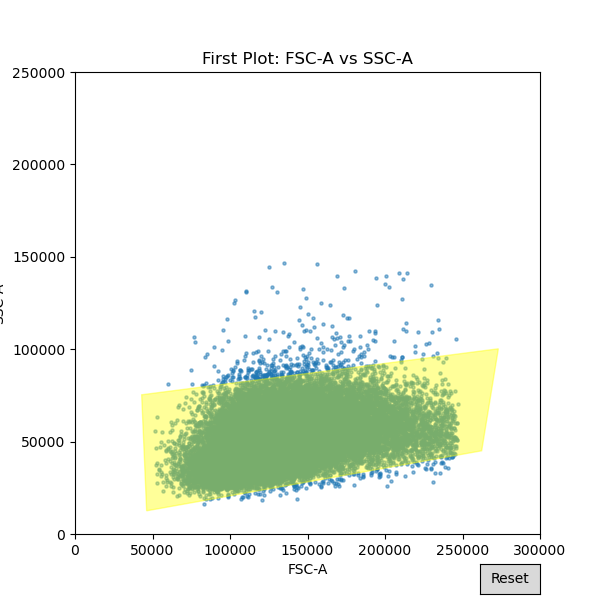

In [11]:
# Function to manually set the polygon coordinates
def set_polygon_1(verts):
    global polygon_coords_1
    polygon_coords_1 = [(round(x, 1), round(y, 1)) for x, y in verts]
    update_filtered_data_1(verts)
    polygon = Polygon(verts, closed=True, fill=True, color='yellow', alpha=0.4)
    ax1.add_patch(polygon)
    plt.draw()
    print(f"Manually set polygon with {len(verts)} vertices.")

# Function to update the first filtered dataframe
def update_filtered_data_1(verts):
    global filtered_data_1
    path = Polygon(verts)
    points = np.c_[data['FSC-A'], data['SSC-A']]
    mask = np.array([path.contains_point(point) for point in points])
    filtered_data_1 = data[mask]
    print(f"Filtered data 1 points: {len(filtered_data_1)}")

# Callback for first polygon selection
def onselect1(verts):
    global polygon_coords_1
    polygon_coords_1 = [(round(x, 1), round(y, 1)) for x, y in verts]
    update_filtered_data_1(verts)
    polygon = Polygon(verts, closed=True, fill=True, color='yellow', alpha=0.4)
    ax1.add_patch(polygon)
    plt.draw()

# Reset button for the first plot
def reset1(event):
    global filtered_data_1
    filtered_data_1 = pd.DataFrame(columns=data.columns)
    # Clear the plot and redraw the scatter plot
    ax1.clear()
    ax1.scatter(data['FSC-A'], data['SSC-A'], alpha=0.5, s=5)
    ax1.set_xlim(0, 300000)
    ax1.set_ylim(0, 250000)
    ax1.set_xlabel('FSC-A')
    ax1.set_ylabel('SSC-A')
    ax1.set_title('First Plot: FSC-A vs SSC-A')
    plt.draw()

# Create the figure and axis for the plot
fig1, ax1 = plt.subplots(figsize=(6, 6))
sc1 = ax1.scatter(data['FSC-A'], data['SSC-A'], alpha=0.5, s=5)
ax1.set_xlim(0, 300000)
ax1.set_ylim(0, 250000)
ax1.set_xlabel('FSC-A')
ax1.set_ylabel('SSC-A')
ax1.set_title('First Plot: FSC-A vs SSC-A')

# Set up the reset button
reset_ax1 = plt.axes([0.8, 0.01, 0.1, 0.05])
reset_button1 = Button(reset_ax1, 'Reset')
reset_button1.on_clicked(reset1)

# Set up the polygon selector
polygon_selector_1 = PolygonSelector(ax1, onselect1)
polygon_coords_1 = [(43010.8, 75324.7), (273118.3, 100216.5), (262365.6, 45021.7), (46236.6, 12554.1)]
set_polygon_1(polygon_coords_1); print(polygon_coords_1)

# Display the plot
plt.show()

In [12]:
print(polygon_coords_1)

[(43010.8, 75324.7), (273118.3, 100216.5), (262365.6, 45021.7), (46236.6, 12554.1)]


In [13]:
len(filtered_data_1)

25813

Filtered data 2 points: 24803
Manually set polygon with 4 vertices.
[(52258.1, 24545.5), (256129.0, 230389.6), (232903.2, 240129.9), (34193.5, 36883.1)]


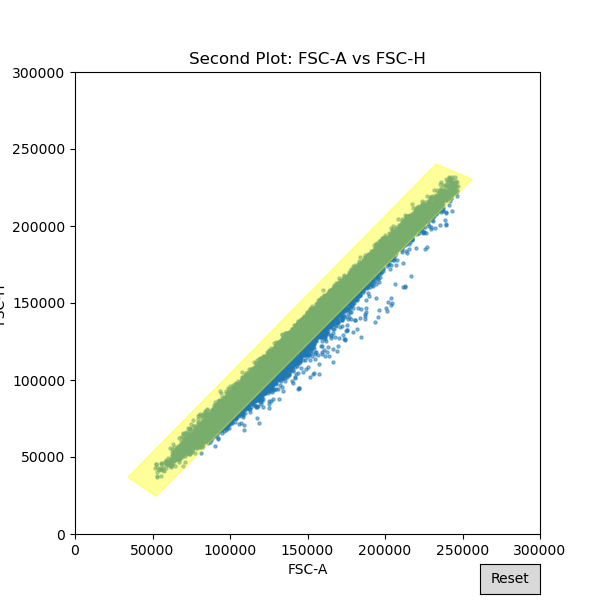

In [14]:
# Second plot: Filtered Data from First Plot
fig2, ax2 = plt.subplots(figsize=(6, 6))
sc2 = ax2.scatter(filtered_data_1['FSC-A'], filtered_data_1['FSC-H'], alpha=0.5, s=5)
ax2.set_xlim(0, 300000); ax2.set_ylim(0, 300000)
ax2.set_xlabel('FSC-A')
ax2.set_ylabel('FSC-H')
ax2.set_title('Second Plot: FSC-A vs FSC-H')

# Global variable to store second polygon coordinates
polygon_coords_2 = []

# Function to manually set the second polygon coordinates
def set_polygon_2(verts):
    global polygon_coords_2
    polygon_coords_2 = [(round(x, 1), round(y, 1)) for x, y in verts]
    update_filtered_data_2(verts)
    polygon = Polygon(verts, closed=True, fill=True, color='yellow', alpha=0.4)
    ax2.add_patch(polygon)
    plt.draw()
    print(f"Manually set polygon with {len(verts)} vertices.")

# Function to update the second filtered dataframe
def update_filtered_data_2(verts):
    global filtered_data_2
    path = Polygon(verts)
    points = np.c_[filtered_data_1['FSC-A'], filtered_data_1['FSC-H']]
    mask = np.array([path.contains_point(point) for point in points])
    filtered_data_2 = filtered_data_1[mask]
    print(f"Filtered data 2 points: {len(filtered_data_2)}")

# Callback for second polygon selection
def onselect2(verts):
    global polygon_coords_2
    polygon_coords_2 = [(round(x, 1), round(y, 1)) for x, y in verts]; print(polygon_coords_2)
    update_filtered_data_2(verts)
    polygon = Polygon(verts, closed=True, fill=True, color='yellow', alpha=0.4)
    ax2.add_patch(polygon)
    plt.draw()

# Reset button for the second plot
def reset2(event):
    global filtered_data_2
    filtered_data_2 = pd.DataFrame(columns=data.columns)
    reset_plot(ax2, sc2, filtered_data_1['FSC-A'], filtered_data_1['FSC-H'], 'Second Plot: FSC-A vs FSC-H')

reset_ax2 = plt.axes([0.8, 0.01, 0.1, 0.05])
reset_button2 = Button(reset_ax2, 'Reset')
reset_button2.on_clicked(reset2)

polygon_selector_2 = PolygonSelector(ax2, onselect2)
polygon_coords_2 = [(52258.1, 24545.5), (256129.0, 230389.6), (232903.2, 240129.9), (34193.5, 36883.1)]
set_polygon_2(polygon_coords_2); print(polygon_coords_2)
plt.show()

In [15]:
print(polygon_coords_2)

[(52258.1, 24545.5), (256129.0, 230389.6), (232903.2, 240129.9), (34193.5, 36883.1)]


In [16]:
len(filtered_data_2)

24803

Filtered data 3 points: 24740
Manually set polygon with 4 vertices.
[(37989.2, 4.0), (263150.5, 4.1), (267021.5, 3.0), (33473.1, 2.5)]


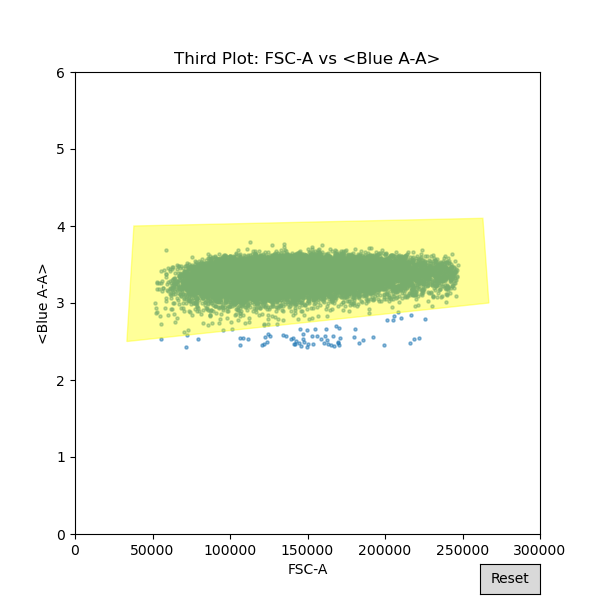

In [17]:
# Third plot: Filtered Data from Second Plot
fig3, ax3 = plt.subplots(figsize=(6, 6))
filtered_data_2.loc[:, channel_1] = np.log10(filtered_data_2[channel_1].clip(lower=1))
sc3 = ax3.scatter(filtered_data_2['FSC-A'], filtered_data_2[channel_1], alpha=0.5, s=5)
ax3.set_xlim(0, 300000); ax3.set_ylim(0, 6)
ax3.set_xlabel('FSC-A')
ax3.set_ylabel(channel_1)
ax3.set_title(f'Third Plot: FSC-A vs {channel_1}')

# Global variable to store third polygon coordinates
polygon_coords_3 = []

# Function to manually set the third polygon coordinates
def set_polygon_3(verts):
    global polygon_coords_3
    polygon_coords_3 = [(round(x, 1), round(y, 1)) for x, y in verts]
    update_filtered_data_3(verts)
    polygon = Polygon(verts, closed=True, fill=True, color='yellow', alpha=0.4)
    ax3.add_patch(polygon)
    plt.draw()
    print(f"Manually set polygon with {len(verts)} vertices.")

# Function to update the third filtered dataframe
def update_filtered_data_3(verts):
    global filtered_data_3
    path = Polygon(verts)
    points = np.c_[filtered_data_2['FSC-A'], filtered_data_2[channel_1]]
    mask = np.array([path.contains_point(point) for point in points])
    filtered_data_3 = filtered_data_2[mask]
    print(f"Filtered data 3 points: {len(filtered_data_3)}")

# Callback for third polygon selection
def onselect3(verts):
    global polygon_coords_3
    polygon_coords_3 = [(round(x, 1), round(y, 1)) for x, y in verts]
    update_filtered_data_3(verts)
    polygon = Polygon(verts, closed=True, fill=True, color='yellow', alpha=0.4)
    ax3.add_patch(polygon)
    plt.draw()

# Reset button for the third plot
def reset3(event):
    global filtered_data_3
    filtered_data_3 = pd.DataFrame(columns=data.columns)
    reset_plot(ax3, sc3, filtered_data_2['FSC-A'], filtered_data_2[channel_1], f'Third Plot: FSC-A vs {channel_1}')

reset_ax3 = plt.axes([0.8, 0.01, 0.1, 0.05])
reset_button3 = Button(reset_ax3, 'Reset')
reset_button3.on_clicked(reset3)

polygon_selector_3 = PolygonSelector(ax3, onselect3)
polygon_coords_3 = [(37989.2, 4.0), (263150.5, 4.1), (267021.5, 3.0), (33473.1, 2.5)]
set_polygon_3(polygon_coords_3); print(polygon_coords_3)
plt.show()

In [18]:
print(polygon_coords_3)

[(37989.2, 4.0), (263150.5, 4.1), (267021.5, 3.0), (33473.1, 2.5)]


In [19]:
len(filtered_data_3)

24740

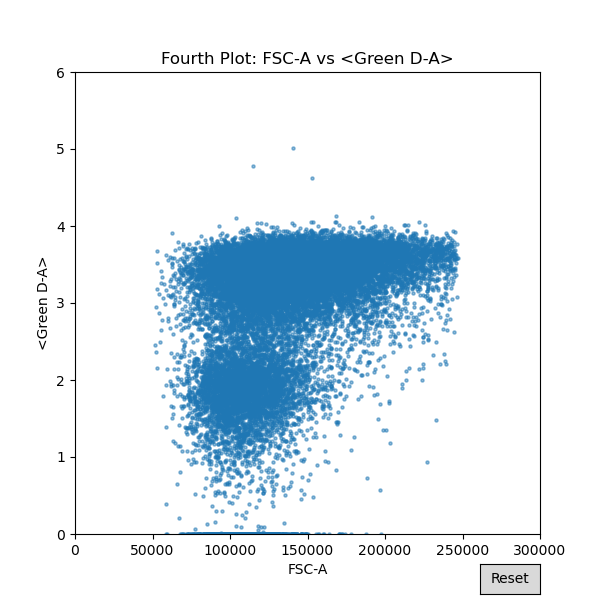

In [20]:
# Fourth plot: Filtered Data from Third Plot
fig4, ax4 = plt.subplots(figsize=(6, 6))
filtered_data_3.loc[:, channel_2] = np.log10(filtered_data_3[channel_2].clip(lower=1))
sc4 = ax4.scatter(filtered_data_3['FSC-A'], filtered_data_3[channel_2], alpha=0.5, s=5)
ax4.set_xlim(0, 300000); ax4.set_ylim(0, 6)
ax4.set_xlabel('FSC-A')
ax4.set_ylabel(channel_2)
ax4.set_title(f'Fourth Plot: FSC-A vs {channel_2}')

# Global variables to store polygon coordinates for both 4a and 4b
polygon_coords_4a = []
polygon_coords_4b = []

# Function to manually set the fourth polygon coordinates (4a)
def set_polygon_4a(verts):
    global polygon_coords_4a
    polygon_coords_4a = [(round(x, 1), round(y, 1)) for x, y in verts]
    update_filtered_data_4a(verts)
    polygon = Polygon(verts, closed=True, fill=True, color='green', alpha=0.4)
    ax4.add_patch(polygon)
    plt.draw()
    print(f"Manually set polygon 4a with {len(verts)} vertices.")

# Function to manually set the second polygon coordinates (4b)
def set_polygon_4b(verts):
    global polygon_coords_4b
    polygon_coords_4b = [(round(x, 1), round(y, 1)) for x, y in verts]
    update_filtered_data_4b(verts)
    polygon = Polygon(verts, closed=True, fill=True, color='red', alpha=0.4)
    ax4.add_patch(polygon)
    plt.draw()
    print(f"Manually set polygon 4b with {len(verts)} vertices.")

# Function to update the filtered data for polygon 4a
def update_filtered_data_4a(verts):
    global filtered_data_4a
    path = Polygon(verts)
    points = np.c_[filtered_data_3['FSC-A'], filtered_data_3[channel_2]]
    mask = np.array([path.contains_point(point) for point in points])
    filtered_data_4a = filtered_data_3[mask]
    print(f"Filtered data 4a points: {len(filtered_data_4a)}")

# Function to update the filtered data for polygon 4b
def update_filtered_data_4b(verts):
    global filtered_data_4b
    path = Polygon(verts)
    points = np.c_[filtered_data_3['FSC-A'], filtered_data_3[channel_2]]
    mask = np.array([path.contains_point(point) for point in points])
    filtered_data_4b = filtered_data_3[mask]
    print(f"Filtered data 4b points: {len(filtered_data_4b)}")

# Callback for polygon 4a selection
def onselect4a(verts):
    global polygon_coords_4a
    polygon_coords_4a = [(round(x, 1), round(y, 1)) for x, y in verts]
    update_filtered_data_4a(verts)
    polygon = Polygon(verts, closed=True, fill=True, color='yellow', alpha=0.4)
    ax4.add_patch(polygon)
    plt.draw()

# Callback for polygon 4b selection
def onselect4b(verts):
    global polygon_coords_4b
    polygon_coords_4b = [(round(x, 1), round(y, 1)) for x, y in verts]
    update_filtered_data_4b(verts)
    polygon = Polygon(verts, closed=True, fill=True, color='red', alpha=0.4)
    ax4.add_patch(polygon)
    plt.draw()

# Reset button for the fourth plot
def reset4(event):
    global filtered_data_4a, filtered_data_4b
    filtered_data_4a = pd.DataFrame(columns=filtered_data_3.columns)
    filtered_data_4b = pd.DataFrame(columns=filtered_data_3.columns)
    reset_plot(ax4, sc4, filtered_data_3['FSC-A'], filtered_data_3[channel_2], f'Fourth Plot: FSC-A vs {channel_2}')

reset_ax4 = plt.axes([0.8, 0.01, 0.1, 0.05])
reset_button4 = Button(reset_ax4, 'Reset')
reset_button4.on_clicked(reset4)

# Create the polygon selectors for both 4a and 4b
polygon_selector_4a = PolygonSelector(ax4, onselect4a)
polygon_selector_4b = PolygonSelector(ax4, onselect4b)

plt.show()

In [21]:
print(polygon_coords_4)

[]


In [22]:
len(filtered_data_4)

0

In [23]:
stop

NameError: name 'stop' is not defined

In [24]:
# Create the polygon selector for polygon 4a
polygon_selector_4a = PolygonSelector(ax4, onselect4a)

In [25]:
# After finishing drawing polygon 4a, disable its events so it won't capture further input
# You can call this manually (e.g., via a button press or after a certain condition is met)
polygon_selector_4a.disconnect_events()  # disable polygon selector 4a

In [26]:
# Now, create (or activate) the polygon selector for polygon 4b
polygon_selector_4b = PolygonSelector(ax4, onselect4b)  # activate polygon selector 4b

In [ ]:
# Fourth plot: Filtered Data from Third Plot
fig4, ax4 = plt.subplots(figsize=(6, 6))
filtered_data_3.loc[:, channel_2] = np.log10(filtered_data_3[channel_2].clip(lower=1))
sc4 = ax4.scatter(filtered_data_3['FSC-A'], filtered_data_3[channel_2], alpha=0.5, s=5)
ax4.set_xlim(0, 300000); ax4.set_ylim(0, 6)
ax4.set_xlabel('FSC-A')
ax4.set_ylabel(channel_2)
ax4.set_title(f'Fourth Plot: FSC-A vs {channel_2}')

# Global variable to store fourth polygon coordinates
polygon_coords_4 = []

# Function to manually set the fourth polygon coordinates
def set_polygon_4(verts):
    global polygon_coords_4
    polygon_coords_4 = [(round(x, 1), round(y, 1)) for x, y in verts]
    update_filtered_data_4(verts)
    polygon = Polygon(verts, closed=True, fill=True, color='yellow', alpha=0.4)
    ax4.add_patch(polygon)
    plt.draw()
    print(f"Manually set polygon with {len(verts)} vertices.")

# Function to update the fourth filtered dataframe
def update_filtered_data_4(verts):
    global filtered_data_4
    path = Polygon(verts)
    points = np.c_[filtered_data_3['FSC-A'], filtered_data_3[channel_2]]
    mask = np.array([path.contains_point(point) for point in points])
    filtered_data_4 = filtered_data_3[mask]
    print(f"Filtered data 4 points: {len(filtered_data_4)}")

# Callback for fourth polygon selection
def onselect4(verts):
    global polygon_coords_4
    polygon_coords_4 = [(round(x, 1), round(y, 1)) for x, y in verts]
    update_filtered_data_4(verts)
    polygon = Polygon(verts, closed=True, fill=True, color='yellow', alpha=0.4)
    ax4.add_patch(polygon)
    plt.draw()

# Reset button for the fourth plot
def reset4(event):
    global filtered_data_4
    filtered_data_4 = pd.DataFrame(columns=data.columns)
    reset_plot(ax4, sc4, filtered_data_3['FSC-A'], filtered_data_3[channel_2], f'Fourth Plot: FSC-A vs {channel_2}')

reset_ax4 = plt.axes([0.8, 0.01, 0.1, 0.05])
reset_button4 = Button(reset_ax4, 'Reset')
reset_button4.on_clicked(reset4)

polygon_selector_4 = PolygonSelector(ax4, onselect4)
#polygon_coords_4 = 
#set_polygon_4(polygon_coords_4); print(polygon_coords_3)
plt.show()